In [119]:
import numpy as np
time_steps = 1000
dt = 0.01

p_actual = np.zeros(time_steps)
v_actual = np.zeros(time_steps)
a_actual = np.zeros(time_steps)

#conditions
p_actual[0] = 0.0
v_actual[0] = 0.0
# speed up, slow down
a_actual[0:100] = 14
a_actual[-100:] = -14

p_noisy  = p_actual*1.0
v_noisy  = v_actual*1.0
a_noisy  = np.zeros(time_steps)

In [120]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_all(plot_list = [p_actual,v_actual,a_actual],label_list=['p_actual','v_actual','a_actual']):
    [plt.plot(v,label=label_list[k]) for k,v in enumerate(plot_list)]
    plt.legend()
    plt.show()

In [121]:
global_sigma = 0.1
def my_rand(mu,sigma):
    return np.random.normal(mu,sigma,1)[0]

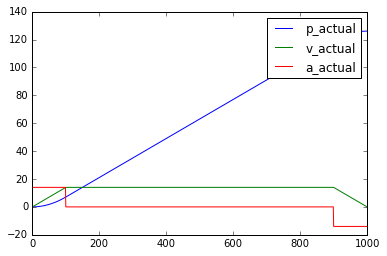

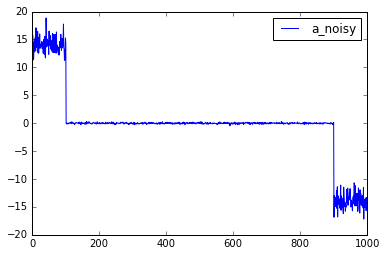

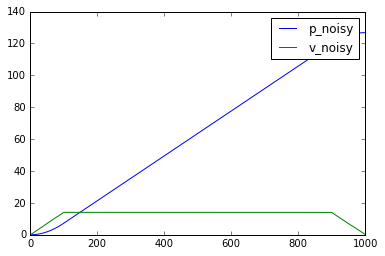

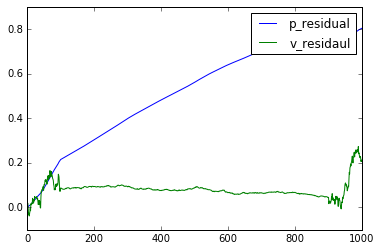

In [122]:
def step_time_noisy(p_t,v_t,a_t):
    a_hat = (a_t + my_rand(0,global_sigma))*my_rand(1,global_sigma)
    v_hat = a_hat*dt + v_t
    p_hat = a_hat*dt*dt + v_hat*dt + p_t
    return p_hat, v_hat, a_hat

def step_time_actual(p_t,v_t,a_t):
    v_next = a_t*dt + v_t
    p_next = a_t*dt*dt + v_t*dt + p_t
    return p_next, v_next
    
def step_all():
    for i in range(1,time_steps):
        p_noisy[i], v_noisy[i], a_noisy[i] = step_time_noisy(p_noisy[i-1],v_noisy[i-1],a_actual[i-1])
        p_actual[i], v_actual[i] = step_time_actual(p_actual[i-1],v_actual[i-1],a_actual[i-1])
               
step_all()
plot_all()
plot_all([a_noisy],['a_noisy'])
plot_all([p_noisy,v_noisy],['p_noisy','v_noisy'])
plot_all([p_noisy-p_actual,v_noisy-v_actual], ['p_residual', 'v_residaul'])

In [123]:
def plot_traj():
    # p = 1/2at + v_0t + p0
    p_hat_future = np.zeros(1500)
    for i in range(len(p_hat_future)):
        p_hat_future[i] = v[-1]*i*dt + p[-1]
    plt.plot(p_hat_future,label='p_hat_future')
    p_actual_future = np.zeros(1500)
    for i in range(len(p_actual_future)):
        p_actual_future[i] = v[0]*i*dt + v[0]*time_steps*dt
    plt.plot(p_actual_future,label='p_actual_future')
    plt.legend()
    plt.show()

In [129]:
modeling_amount = []

global_sigma = 0.05

final_delta = []
last_5_secs_drift = []
for i in range(1000):
    step_all()
    final_delta.append(abs(p_actual[-1] - p_noisy[-1]))
    last_5_secs_drift.append((p_actual[-1] - p_noisy[-1]) - (p_actual[-500] - p_noisy[-500]))

print np.average(last_5_secs_drift)
modeling_amount.append(np.std(last_5_secs_drift)**2/150.0)
print np.std(last_5_secs_drift)
print

global_sigma = 0.1

final_delta = []
last_5_secs_drift = []
for i in range(1000):
    step_all()
    final_delta.append(abs(p_actual[-1] - p_noisy[-1]))
    last_5_secs_drift.append((p_actual[-1] - p_noisy[-1]) - (p_actual[-500] - p_noisy[-500]))

print np.average(last_5_secs_drift)
modeling_amount.append(np.std(last_5_secs_drift)**2/150.0)
print np.std(last_5_secs_drift)
print

global_sigma = 0.2
final_delta = []
last_5_secs_drift = []

for i in range(1000):
    step_all()
    final_delta.append(abs(p_actual[-1] - p_noisy[-1]))
    last_5_secs_drift.append((p_actual[-1] - p_noisy[-1]) - (p_actual[-500] - p_noisy[-500]))

print np.average(last_5_secs_drift)
modeling_amount.append(np.std(last_5_secs_drift)**2/150.0)
print np.std(last_5_secs_drift)
print


global_sigma = 0.5
final_delta = []
last_5_secs_drift = []

for i in range(1000):
    step_all()
    final_delta.append(abs(p_actual[-1] - p_noisy[-1]))
    last_5_secs_drift.append((p_actual[-1] - p_noisy[-1]) - (p_actual[-500] - p_noisy[-500]))

print np.average(last_5_secs_drift)
modeling_amount.append(np.std(last_5_secs_drift)**2/150.0)
print np.std(last_5_secs_drift)
print



global_sigma = 1.0

final_delta = []
last_5_secs_drift = []

for i in range(1000):
    step_all()
    final_delta.append(abs(p_actual[-1] - p_noisy[-1]))
    last_5_secs_drift.append((p_actual[-1] - p_noisy[-1]) - (p_actual[-500] - p_noisy[-500]))

print np.average(last_5_secs_drift)
modeling_amount.append(np.std(last_5_secs_drift)**2/150.0)
print np.std(last_5_secs_drift)
print

0.1488449154
0.370586552735

0.151670696592
0.684298379829

0.207120399892
1.48017945215

-0.0195808302133
3.62094687465

0.0627441633518
7.29414548843



In [130]:
print modeling_amount

[0.00091556262045586125, 0.0031217618175774608, 0.014606208070502088, 0.087408375127000115, 0.35469705604210827]


In [128]:
# suggested noise levels  [0.0, 0.05, 0.1, 0.2, 0.5, 1.0]
# sqrt stdev  = [0.0, 0.0039590925606411316, 0.0055629774541412014, 0.0080590328538615846, 0.012824252232531809, 0.018219117473368938] 
# square stdev [0, 0.00091556262045586125, 0.0031217618175774608, 0.014606208070502088, 0.087408375127000115, 0.35469705604210827]